# Object detection in images

## Learning objectives
* understanding the idea behind object detection (classification and localisation)

## Key terms:
* Object classification
* Object classification
* Automatic Image Processing
* Performance Evaluation

## Theoretical aspects

- Regresie - scopul rezolvarii unei probleme de regresie este predictia unor valori reale. Calitatea predictiei (pe un set de date de control) consta in insumarea diferentelor (absolute sau ridicate la puterea a 2-a) dintre valoarea reala si valoarea prezisa de algoritm.

- Clasificare - scopul rezolvarii unei probleme de clasificare este predictia unor valori discrete (etichete). Calitatea predictiei (pe un set de date de control) consta in numararea diferentelor dintre valoarea (eticheta) reala si valoarea (Eticheta) prezisa de algoritm.

    


## Examples

### Regression problems


<details>
  <summary>Remember the theory behind error functions</summary>
  
In a regression problem, the outputs of a prediction algorithm are represented by real values. 
For instance, we want to estimate the icecream consumption (in a camp) according to the temperature and the number of children in a camp. This is a single-target regression problem (the target is icecream consumption) with two features (the temperature and the number of children).

Suppose that an ML algorithm has provided, for a set of camps (known as set of inputs or set of samples), a set of icecream consumption (known as set of outputs) $computedOutputs$. The real icecream consumption are also known ($realOutputs$). Determine the algorithm's performance.

A possible performance measure is given by the prediction error expressed as sum of the distances between the real outputs and the predicted outputs. The distance, for each sample, can be measured as:
- the absolute difference  (this is $L_1$ distance):
$$Error = \frac{1}{noSamples} \times \sum_{i=1}^{noSamples} |realNoInfections_i - computedNoInfections_i| = Mean Absolute Error (MAE)$$
- the square difference (this is the $L_2$ distance):
$$Error = \sqrt{\frac{1}{noSamples} \times \sum_{i=1}^{noSamples} (realNoInfections_i - computedNoInfections_i) ^ 2} = Root Mean Square Error (RMSE)$$ 


</details>


#### **Demo1**

Consider some real values and some predicted values (obtained by the ML algorithm) and we want ot estimate the error of prediction

| Country |	HappinessScore | PredictedScore |
| --- | --- | --- |
| Norway | 7.53 | 7.80 |
| Denmark | 7.52 | 7.75 |
| Iceland | 7.50 | 7.45 |
| Switzerland |	7.49 | 7.60 |
| Finland | 7.46 | 7.40 |

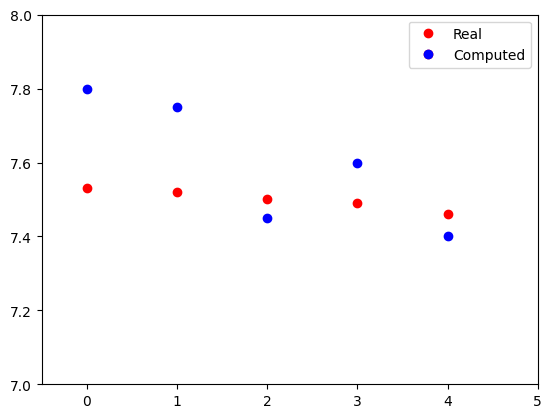

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Problem specification:
# input: realOutputs, computedOutputs - arrays of the same length containing real numbers
# output: error - real value

realOutputs = [7.53, 7.52, 7.5, 7.49, 7.46]
computedOutputs = [7.8, 7.75, 7.45, 7.6, 7.4]

# plot the data
indexes = [i for i in range(len(realOutputs))]
real, = plt.plot(indexes, realOutputs, 'ro', label = 'real')
computed, = plt.plot(indexes, computedOutputs, 'bo', label = 'computed')
plt.xlim(-0.5,5)
plt.ylim(7, 8)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()


In [2]:

# compute the prediction error

# MAE
errorL1 = sum(abs(r - c) for r, c in zip(realOutputs, computedOutputs)) / len(realOutputs)
print('Error (L1): ', errorL1)

# RMSE
errorL2 = sqrt(sum((r - c) ** 2 for r, c in zip(realOutputs, computedOutputs)) / len(realOutputs))
print('Error (L2): ', errorL2)


Error (L1):  0.14399999999999977
Error (L2):  0.16970562748477128


### Binary classification problems 

<details>
  <summary>Remember the theory behind error functions</summary>
   

If we deal by a binary classification problem <img src="images\binClass.png" width="100">, the outputs represent some labels. There are possible two labels, only (one for each class or output type). Suppose that class 1 is the positive class, while class 2 is the negative class. For instance, if we want to classify the emails into spam or ham messages, *spam* and *ham* are the two classes. 

An ML algorithm has provided, for a set of emails (known as set of inputs or set of samples), a set of spam/ham labels (known as set of outputs) $computedOutputs$. The real labels are also known $realOutputs$. Determine the algorithm's performance. 

Three performance measures are usefull for a classification problem: accuracy, precision, recall. Some pre-computations, enclosed in the confusion matrix are useful: 
- true positive 
- false positive
- true negative
- false negative

The confusion matrix has the form: <img src="images\cm.png" width="400">
- accuracy represents the overall performance of classification model: 
$$acc = \frac{TP + TN}{TP + TN + FP + FN} = \frac{correc predicted}{no of all samples}$$
- precision indicates how accurate the positive predictions are:  <img src="images\PR.png" width="100">
$$precision = \frac{TP}{TP+FP}$$
- recall indicates the coverage of actual positive sample: 
$$recall = \frac{TP}{TP+FN}$$



</details>


#### **Demo2.1**

Consider a set of emails, **half** of them being good ones (ham) and the others not (spam). We obtained the predicted labels by using an ML agorithm (obtained by the ML algorithm) and we want ot estimate the quality of prediction.

| email |	RealLabel | PredictedLabel |
| --- | --- | --- |
| FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv | spam | spam |
| Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030  | spam | ham |
| I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today   | ham | ham |
| I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times  | ham | spam |
| XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL  | spam | spam |
| I'm back &amp; we're packing the car now, I'll let you know if there's room | ham | ham |

In [ ]:
pip install scikit-learn

In [13]:
# packages required

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# consider some real labels and some predicted labels (obtained by the ML algorithm - a classifier)
# we want ot estimate the error of prediction (classification)

# Problem specification:
# input: realLabels, computedLabels - arrays of the same length containing binary labels (some discrete values)
# output: accuracy, precision, recall - real values in range [0,1]


# a balanced data set (each class containes the same numer of samples)

realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computedLabels =    ['spam', 'ham', 'ham', 'spam', 'spam', 'ham']



# suppose that 'spam' is the positive class (and 'ham' is the negative class)
# compute the prediction performance

# version 1 - using the sklearn functions
def evalClassificationV1(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
    cm = confusion_matrix(realLabels, computedLabels, labels = labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 

# version 2 - native code
def evalClassificationV2(realLabels, computedLabels, pos, neg):
    # noCorrect = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == computedLabels[i]):
    #         noCorrect += 1
    # acc = noCorrect / len(realLabels)
    acc = sum([1 if realLabels[i] == computedLabels[i] else 0 for i in range(0, len(realLabels))]) / len(realLabels)

    # TP = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == 'spam' and computedLabels[i] == 'spam'):
    #         TP += 1
    TP = sum([1 if (realLabels[i] == pos and computedLabels[i] == pos) else 0 for i in range(len(realLabels))])
    FP = sum([1 if (realLabels[i] == neg and computedLabels[i] == pos) else 0  for i in range(len(realLabels))])
    TN = sum([1 if (realLabels[i] == neg and computedLabels[i] == neg) else 0 for i in range(len(realLabels))])
    FN = sum([1 if (realLabels[i] == pos and computedLabels[i] == neg) else 0  for i in range(len(realLabels))])

    precisionPos = TP / (TP + FP)
    recallPos = TP / (TP + FN)
    precisionNeg = TN / (TN + FN)
    recallNeg = TN / (TN + FP)

    return acc, precisionPos, precisionNeg, recallPos, recallNeg
    
acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham'])

# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'spam', 'ham')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)

acc:  0.6666666666666666  precision:  [0.66666667 0.66666667]  recall:  [0.66666667 0.66666667]


#### **Demo2.2**

Consider a set of persons and their tests against COVID. We have the PCR-test results (infected vs. normal) and those obtained by an ML algorithms. We want to estimate the quality of ML prediction.

**Note: just a few people were detected as infected by the PCR-test!!! Hppy us!** :smile:

| Person |	RealLabel | PredictedLabel |
| --- | --- | --- |
| person01 | infected | infected |
| person02 | infected | infected |
| person03 | infected | normal |
...

In [14]:
# consider some real labels and some predicted labels (obtained by the ML algorithm - a classifier)
# we want ot estimate the error of prediction (classification)

# Problem specification:
# input: realLabels, computedLabels - arrays of the same length containing binary labels (some discrete values)
# output: accuracy, precision, recall - real values in range [0,1]

# an unbalanced data set (the numer of samples from each class are not uniform distributed)

realLabels =        ['infected', 'infected', 'infected', 'infected', 'normal', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal']
computedLabels =    ['infected', 'infected', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'infected']

acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['infected', 'normal'])
# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'infected', 'normal')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


acc:  0.8  precision:  [0.66666667 0.83333333]  recall:  [0.5        0.90909091]


### Object detection in images

Image classification 
- Does an image contain object X? -> yes, no

Object localisation
- Does an image contain object X? -> yes, no
- Where is the object X? -> Location of the object
    * Object-based granularity  -> object detection
    * Pixel-based granularity -> semantic segmentation

Classification - Problem specification
- Input: image
- Output: class (label)
- Evaluation metric: accuracy, precision, recall

Localisation - Problem specification
- Input: image
- Output: bounding box’s coordinates 
    - (xcorner, ycorner, w, h) 
    - (xcorner1, ycorner1, xcorner2, ycorner2) 
    - (xcenter, ycenter, w, h) 
- Evaluation metric:
    - intersection over union <img src="images\IoU.png" width="100">   
    - average precision


### Prerequisites for classification by Azure resources


1. Create an Azure subscription [more details](https://azure.microsoft.com/en-gb/free/ai-services/)

2. Create a Vision resource 
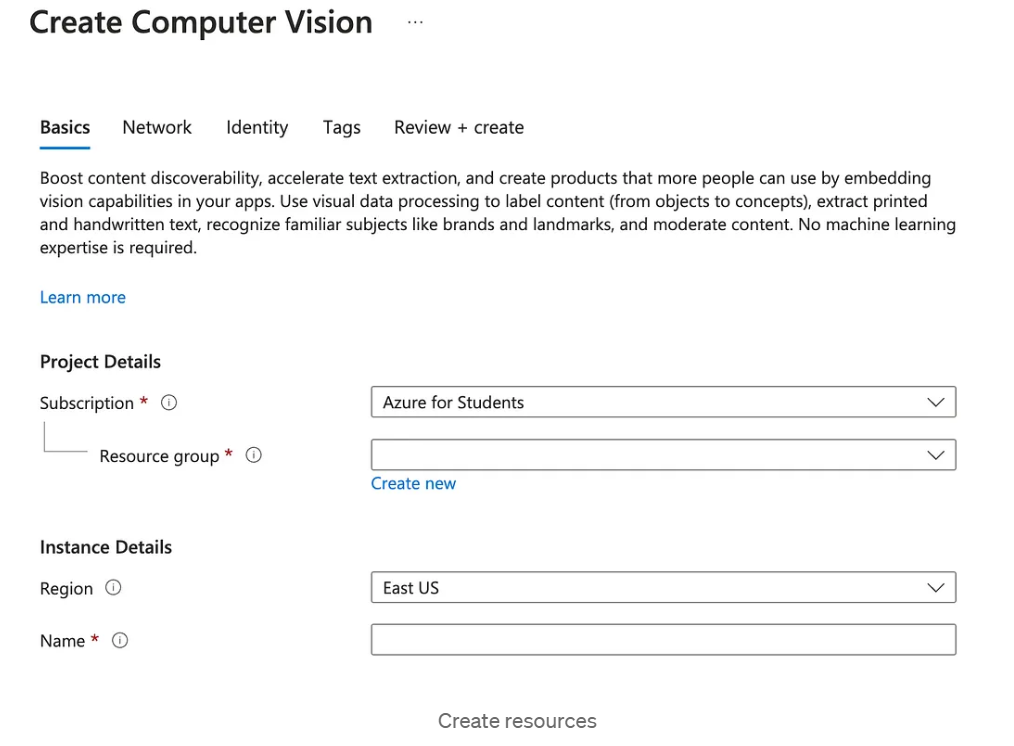

3. Save the key and endpoint
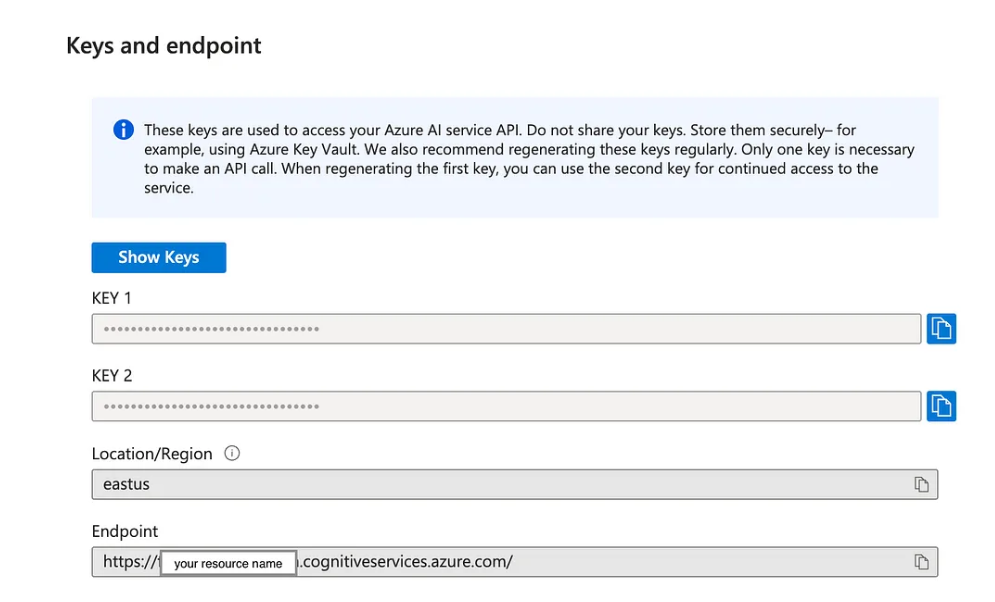

4. Install packages


In [ ]:
pip install azure-cognitiveservices-vision-computervision
pip install pillow

### Processing

5. Authenticate credentials and create a client

In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [2]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

6. Process the image

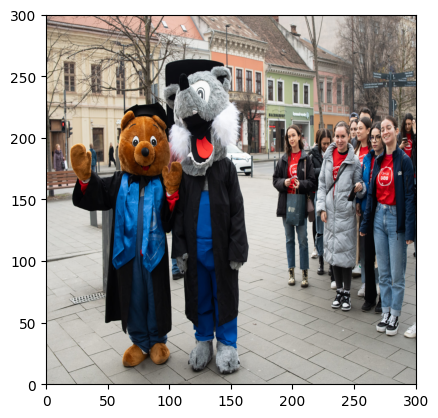

In [3]:
im = plt.imread("images\people.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
plt.show()

In [4]:
img = open("images/people.jpg", "rb")
result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.tags, VisualFeatureTypes.objects])
print("tags ")
for tag in result.tags:
    print(tag)
    if (tag.name == "people") or (tag.name == "person") or (tag.name == "human") or (tag.name == "man"):
        print("People detected: ", tag.confidence)
print("objects ")
for ob in result.objects:
    print(ob.object_property, ob.rectangle)

tags 
{'additional_properties': {}, 'name': 'clothing', 'confidence': 0.9918707013130188, 'hint': None}
{'additional_properties': {}, 'name': 'footwear', 'confidence': 0.989210844039917, 'hint': None}
{'additional_properties': {}, 'name': 'person', 'confidence': 0.9828457832336426, 'hint': None}
People detected:  0.9828457832336426
{'additional_properties': {}, 'name': 'outdoor', 'confidence': 0.9756386280059814, 'hint': None}
{'additional_properties': {}, 'name': 'jeans', 'confidence': 0.9706963300704956, 'hint': None}
{'additional_properties': {}, 'name': 'mascot', 'confidence': 0.9627652168273926, 'hint': None}
{'additional_properties': {}, 'name': 'building', 'confidence': 0.957897424697876, 'hint': None}
{'additional_properties': {}, 'name': 'jacket', 'confidence': 0.9482132792472839, 'hint': None}
{'additional_properties': {}, 'name': 'smile', 'confidence': 0.9180234670639038, 'hint': None}
{'additional_properties': {}, 'name': 'man', 'confidence': 0.9173215627670288, 'hint': Non

7. Object detection

Input: an image

Output: the location of some objects (e.g. coordinates of a bounding box around the objects)

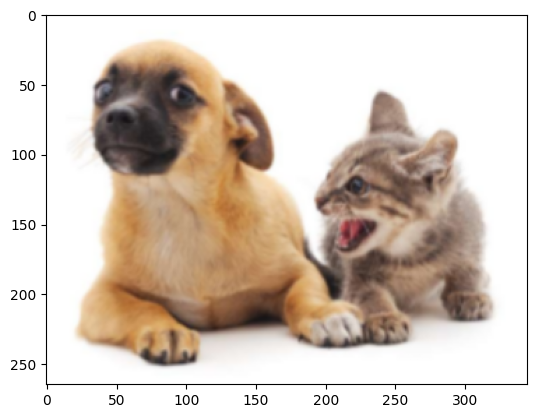

In [24]:
# plot the image
im = plt.imread("images/animals.png")
# fig, ax = plt.subplots()
# im = ax.imshow(im, extent=[0, 300, 0, 300])
# plt.show()
fig = plt.imshow(im)
plt.show()

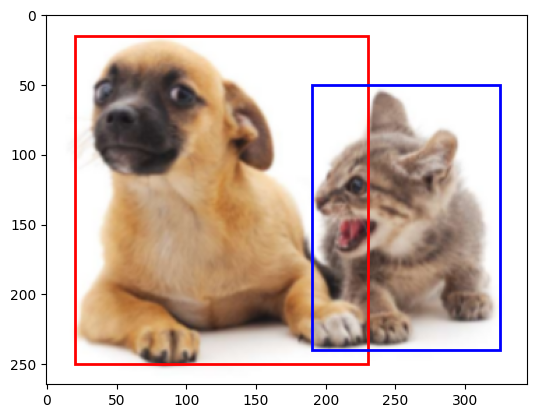

In [26]:
# add manually some bounding boxes for each object
dog_bb = [20.0, 15.0, 230, 250.0]
cat_bb = [190.0, 50.0, 325.0, 240.0]
im = plt.imread("images/animals.png")
fig = plt.imshow(im)
fig.axes.add_patch(plt.Rectangle(xy = (dog_bb[0], dog_bb[1]), width = dog_bb[2]-dog_bb[0], height = dog_bb[3]-dog_bb[1], fill = False, color = "red", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (cat_bb[0], cat_bb[1]), width = cat_bb[2]-cat_bb[0], height = cat_bb[3]-cat_bb[1], fill = False, color = "blue", linewidth = 2))
plt.show()

ground truth bb:  [190.0, 50.0, 325.0, 240.0]
predicted cat bb:  [186, 50, 324, 235]
Error:  10.5


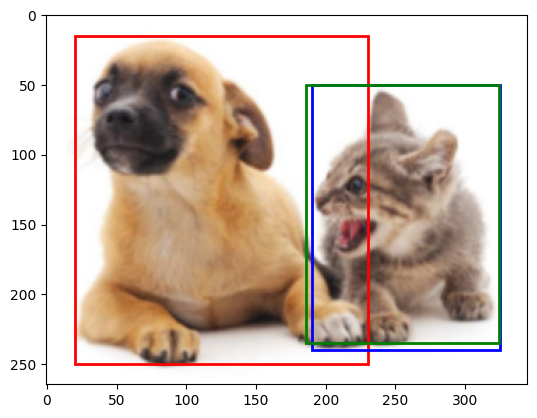

In [33]:
# automatically identify the object location
img = open("images/animals.png", "rb")
result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
for ob in result.objects:
    if (ob.object_property == "cat"):
        predicted_cat_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
        
# compute the error of detection (differneces between the real location and the predicted location)
err = 0
for v in zip(predicted_cat_bb, cat_bb):
    err = err + (v[0] - v[1])**2
err /= 4
print("detection error: ", err)

# show these differences on the image
im = plt.imread("images/animals.png")
fig = plt.imshow(im)
fig.axes.add_patch(plt.Rectangle(xy = (dog_bb[0], dog_bb[1]), width = dog_bb[2]-dog_bb[0], height = dog_bb[3]-dog_bb[1], fill = False, color = "red", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (cat_bb[0], cat_bb[1]), width = cat_bb[2]-cat_bb[0], height = cat_bb[3]-cat_bb[1], fill = False, color = "blue", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (predicted_cat_bb[0], predicted_cat_bb[1]), width = predicted_cat_bb[2]-predicted_cat_bb[0], height = predicted_cat_bb[3]-predicted_cat_bb[1], fill = False, color = "green", linewidth = 2))

plt.show()

